In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

- Прочитаем данные

In [7]:
df=pd.read_excel('Analytic_test.xlsx', index_col=0, header=1)

In [18]:
df.head(5)

,HID,active_Red,has_Green_id,has_Black_id,has_Blue_id,Blue_activity_count,Blue_gmv_total,Green_gvm_total,Green_gvm_order_count,Black_gvm_total,...,Blue_android,Red_apple,Green_apple,Black_apple,Blue_apple,is_msk,Red_web,Green_web,Black_web,Blue_web
0,00003c7fb5e57ce673f1801f3679f5c25,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00006b602533083e3bebfcbff08613931,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0000736c3f76339196cb1cc759b8363b,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00009bdcc5307b38efde8690b8bd658e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0000bc3186b7b31d9b35d3fbbb250b9f8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
df.shape

(100000, 24)

### Подготовим данные

- Проверим на пропуски в данных

In [23]:
df.isnull().sum()

HID                      0
active_Red               0
has_Green_id             0
has_Black_id             0
has_Blue_id              0
Blue_activity_count      0
Blue_gmv_total           1
Green_gvm_total          0
Green_gvm_order_count    0
Black_gvm_total          0
Black_gvm_order_count    0
Red_android              0
Green_android            0
Black_android            0
Blue_android             0
Red_apple                0
Green_apple              0
Black_apple              0
Blue_apple               0
is_msk                   0
Red_web                  0
Green_web                0
Black_web                0
Blue_web                 0
dtype: int64

- Пропусков есть, посмотрим еще на типы данных и если что исправим вместе

- Посмотрим на типы данных

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   HID                    100000 non-null  object 
 1   active_Red             100000 non-null  float64
 2   has_Green_id           100000 non-null  float64
 3   has_Black_id           100000 non-null  float64
 4   has_Blue_id            100000 non-null  float64
 5   Blue_activity_count    100000 non-null  object 
 6   Blue_gmv_total         99999 non-null   float64
 7   Green_gvm_total        100000 non-null  float64
 8   Green_gvm_order_count  100000 non-null  object 
 9   Black_gvm_total        100000 non-null  float64
 10  Black_gvm_order_count  100000 non-null  object 
 11  Red_android            100000 non-null  float64
 12  Green_android          100000 non-null  float64
 13  Black_android          100000 non-null  float64
 14  Blue_android           100000 non-nul

-  Blue_activity_count, Green_gvm_order_count, Black_gvm_order_count это все количества, поэтому тип должен быть вещественным, посмотрим какие значения там есть

In [98]:
df.Blue_activity_count.unique()

array(['2.0', '0.0', '1.0', '17.0', '13.0', '5.0', '6.0', '26.0', '8.0',
       '4.0', '27.0', '19.0', '12.0', '9.0', '3.0', '20.0', '10.0',
       '23.0', '7.0', '16.0', '14.0', '15.0', '53.0',
       datetime.datetime(2019, 5, 4, 0, 0), '32.0', '11.0', '18.0',
       '24.0', '119.0', '49.0', '39.0', '21.0',
       datetime.datetime(2019, 5, 7, 0, 0), '35.0', '72.0', '30.0',
       '71.0', '28.0', '42.0', '34.0', '41.0', '22.0', '29.0', '36.0',
       '90.0', '40.0', '43.0', datetime.datetime(2019, 5, 1, 0, 0),
       '51.0', '44.0', '25.0', '31.0', '45.0', '67.0', '33.0', '101.0',
       '74.0', '46.0', '111.0', '66.0', '38.0', '63.0', '100.0', '237.0',
       '59.0', datetime.datetime(2019, 5, 3, 0, 0),
       datetime.datetime(2019, 5, 6, 0, 0), '37.0', '47.0'], dtype=object)

In [99]:
df.Green_gvm_order_count.unique()

array(['0.0', '2.0', '26.0', '5.0', '37.0', '3.0', '12.0', '7.0', '1.0',
       '6.0', '8.0', datetime.datetime(2019, 5, 4, 0, 0), '4.0', '40.0',
       '9.0', '22.0', '14.0', '15.0', '85.0', '25.0', '10.0', '20.0',
       '18.0', '11.0', '31.0', '23.0', '39.0', '13.0', '42.0', '127.0',
       '28.0', '101.0', '32.0', '30.0', '27.0', '51.0', '83.0', '36.0',
       '16.0', '64.0', '19.0', '29.0', '24.0', '52.0', '82.0', '45.0',
       '50.0', '62.0', '49.0', '21.0', '56.0', '65.0', '100.0', '76.0',
       '88.0', '17.0', '69.0', '114.0', '35.0', '125.0', '38.0', '108.0',
       '168.0', '84.0', '63.0', '75.0', '34.0', '78.0', '43.0', '60.0',
       datetime.datetime(2019, 5, 2, 0, 0)], dtype=object)

In [100]:
df.Black_gvm_order_count.unique()

array(['0.0', '1.0', '4.0', '2.0', '3.0', '5.0', '8.0', '25.0', '7.0',
       '27.0', '6.0', '15.0', '9.0', '10.0', '50.0', '22.0', '13.0',
       '12.0', '14.0', '16.0', '20.0', '26.0', '11.0', '18.0', '21.0',
       datetime.datetime(2019, 5, 2, 0, 0), '19.0', '37.0', '33.0',
       '17.0', '35.0', '29.0', '51.0', '23.0', '42.0', '60.0', '34.0',
       '36.0', datetime.datetime(2019, 5, 6, 0, 0)], dtype=object)

- В этих столбцах присутствуют ошибки, в каждом содержится дата, уберем их

In [106]:
df.Blue_activity_count=pd.to_numeric(df.Blue_activity_count, errors='coerce')
df.Green_gvm_order_count=pd.to_numeric(df.Green_gvm_order_count, errors='coerce')
df.Black_gvm_order_count=pd.to_numeric(df.Black_gvm_order_count, errors='coerce')
df=df.dropna()

- Посмторим еще раз

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99986 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   HID                    99986 non-null  object 
 1   active_Red             99986 non-null  float64
 2   has_Green_id           99986 non-null  float64
 3   has_Black_id           99986 non-null  float64
 4   has_Blue_id            99986 non-null  float64
 5   Blue_activity_count    99986 non-null  float64
 6   Blue_gmv_total         99986 non-null  float64
 7   Green_gvm_total        99986 non-null  float64
 8   Green_gvm_order_count  99986 non-null  float64
 9   Black_gvm_total        99986 non-null  float64
 10  Black_gvm_order_count  99986 non-null  float64
 11  Red_android            99986 non-null  float64
 12  Green_android          99986 non-null  float64
 13  Black_android          99986 non-null  float64
 14  Blue_android           99986 non-null  float64
 15  Re

In [112]:
df.isnull().sum().sum()

0

- Мы исправили ошибки в данных и убрали пропуски

### Вычисления 

- Описательные статистики

In [119]:
df.describe()

,active_Red,has_Green_id,has_Black_id,has_Blue_id,Blue_activity_count,Blue_gmv_total,Green_gvm_total,Green_gvm_order_count,Black_gvm_total,Black_gvm_order_count,...,Blue_android,Red_apple,Green_apple,Black_apple,Blue_apple,is_msk,Red_web,Green_web,Black_web,Blue_web
count,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000,...,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000
mean,0.558718,0.008831,0.010782,0.137779,0.210039,2.461325,59.839177,0.076991,94.695457,0.043856,...,0.080421,0.108745,0.006161,0.017822,0.046457,0.119177,0.671044,0.001980,0.014582,0.106325
std,0.496543,0.093666,0.103467,0.359915,2.099500,126.682942,1230.627532,1.693890,1699.044593,0.749914,...,0.271946,0.311321,0.078249,0.132307,0.210473,0.323998,0.469836,0.044456,0.119873,0.308255
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,2.000000,2.000000,4.000000,237.000000,32302.000000,94106.000000,168.000000,188252.000000,60.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Признаков слишком сразу сказать что-то сложно, нужно выдвигать гипотезы и точечно делать анализ

- Посмотрим на 3 самых сильных корреляций 

In [123]:
a=df.corr().unstack().sort_values(ascending=False).drop_duplicates().to_frame().reset_index()
a=a[a.level_0!=a.level_1]
a.head(3)

,level_0,level_1,0
1,Green_gvm_total,Green_gvm_order_count,0.955045
2,Black_gvm_total,Black_gvm_order_count,0.913995
3,Blue_apple,Red_apple,0.607021


- Логично что есть линейная зависимость между суммарным gvm пользователя в сервисе и количеством успешных заказов у green и black компаний, так как чем пользователь проводит больше времени тем больше он разбирается и знает чего хочет.
- Также у blue и red компаний небольшая линейная зависимость при установке на платформе apple, воможно они проводили коллабарацию или услиги этих компаний взаимозаменяемы

- Я заметил, что в 4 компаниях разное колличество признаков, и некоторые признаки отличаются, но у всех 4 есть три одинаковых признака, поэтому сравнивать компании можно только при помощи них. Эти признаки: company_android, company_apple, company_web

**Посмотрим у какой компании наибольшее число пользователей**

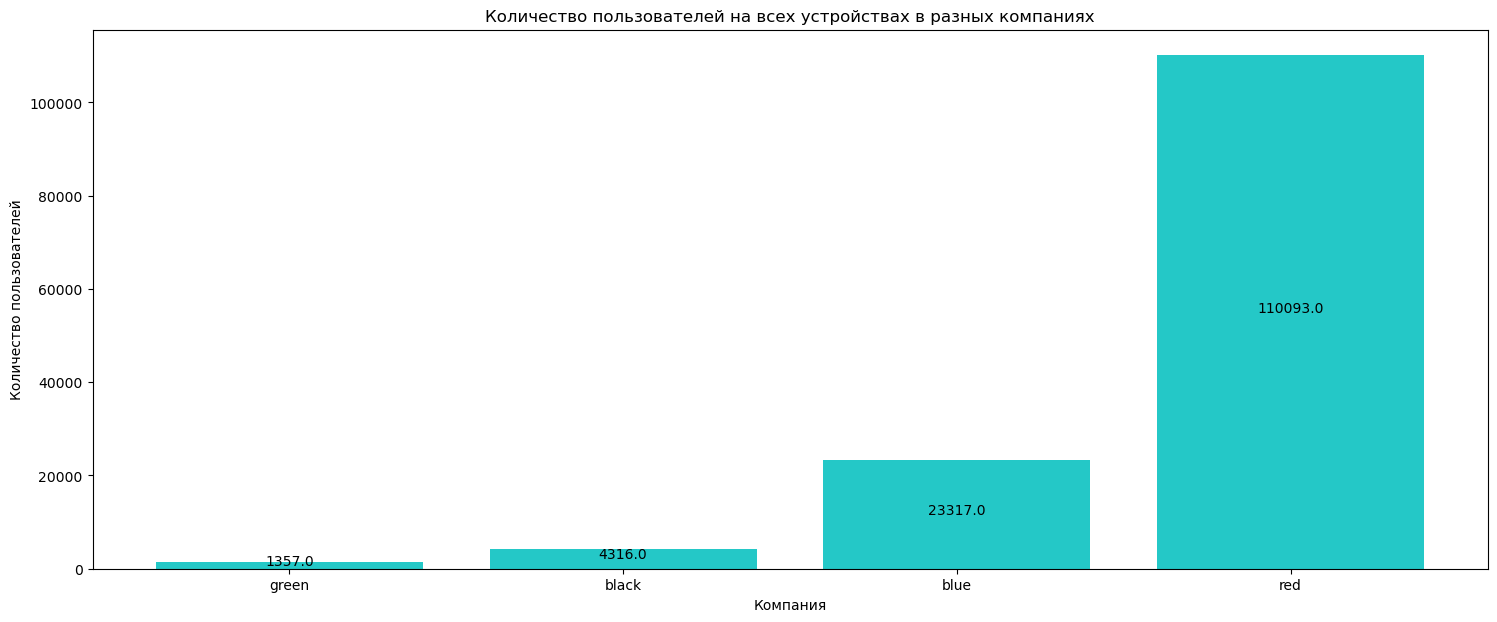

In [172]:
users_black=df.Black_android.sum()+df.Black_apple.sum()+df.Black_web.sum()
users_green=df.Green_android.sum()+df.Green_apple.sum()+df.Green_web.sum()
users_blue=df.Blue_android.sum()+df.Blue_apple.sum()+df.Blue_web.sum()
users_red=df.Red_android.sum()+df.Red_apple.sum()+df.Red_web.sum()

data={'company':['black', 'green', 'blue', 'red'], 'users': [users_black, users_green, users_blue, users_red]}
df1=pd.DataFrame(data)
df1=df1.sort_values(by='users')

plt.figure(figsize = [18, 7])
plt.bar(df1['company'], df1['users'], color = '#24c8c7')

for i in range(df1['users'].shape[0]):
    plt.text(
        i, 
        df1['users'].iloc[i] / 2,
        df1['users'].iloc[i], 
        ha = 'center'
    )

plt.ylabel('Количество пользователей')
plt.xlabel('Компания')
plt.title('Количество пользователей на всех устройствах в разных компаниях')
plt.show()

- Как видно из графика, наибольшее число пользователей (с большим отрывом) у компании Red, а самое меньшее у green

- Посмотрим с каких устройств сидят пользователи в компании Red

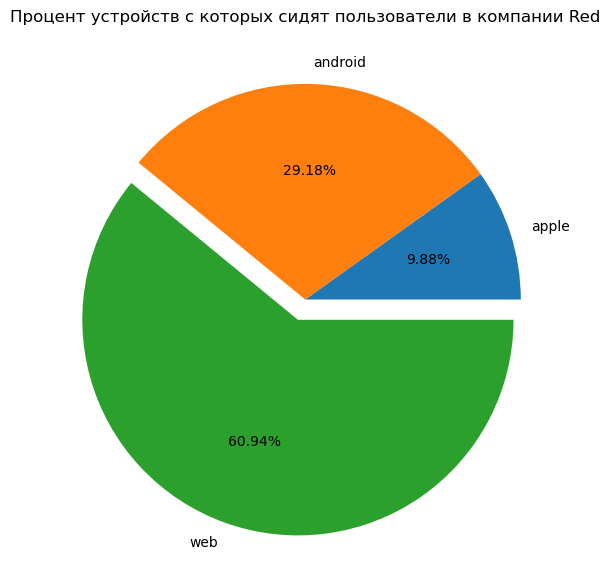

In [152]:
apple=df.Red_apple.sum()
android=df.Red_android.sum()
web=df.Red_web.sum()

data={'device':['apple', 'android', 'web'], 'users': [apple, android, web]}
df1=pd.DataFrame(data)
df1=df1.sort_values(by='users')


plt.figure(figsize = [7, 7])
plt.pie(
    x = df1['users'],
    labels = df1['device'],
    explode = [0, 0, 0.1], 
    autopct = '%1.2f%%',
    pctdistance = 0.6,
    labeldistance = 1.1,
)

plt.title('Процент устройств с которых сидят пользователи в компании Red')
plt.show()

**Вывод :** Как видно из диаграммы, у компании у которой больше всего пользователей (скорее всего ведущая на рынке) большинство всего пользователей предпочитают сидеть с ПК, значит более выгоднее развивать этот сегмент, так как люди не покупают технику лишь бы скачать приложение это, поэтому выгоднее работать сразу с большой аудиторией. Жалко нет столба с количеством активных действий пользователя в системе, можно было бы узнать является ли эта аудитория реальной или нет. (в данных есть столбец active_Red, но в задании нет его описания а тип данных в нем бинарный, так что точно не количество активных действий)

- Также посмотрим на компанию green

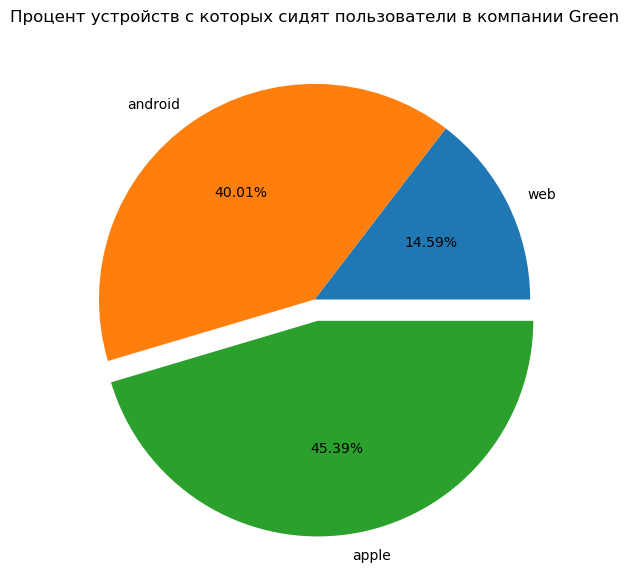

In [155]:
apple=df.Green_apple.sum()
android=df.Green_android.sum()
web=df.Green_web.sum()

data={'device':['apple', 'android', 'web'], 'users': [apple, android, web]}
df1=pd.DataFrame(data)
df1=df1.sort_values(by='users')


plt.figure(figsize = [7, 7])
plt.pie(
    x = df1['users'],
    labels = df1['device'],
    explode = [0, 0, 0.1], 
    autopct = '%1.2f%%',
    pctdistance = 0.6,
    labeldistance = 1.1,
)

plt.title('Процент устройств с которых сидят пользователи в компании Green')
plt.show()

**Вывод :** Как видно из диаграммы, у компании у которой меньше всего пользователей (скорее всего самая молодая компания на рынке) большинство пользователей предпочитают сидеть с телефонов, значит нужно развивать в первую очередь приложения для телефонов, чтобы получить определенную популярность в этом сегменте и переходить к пк версии

- Разберемеся в компании green получше, у нее и у black есть одинаковый признак: количество успешных заказов. А так как эти две компании по количеству пользователей отличаются на 3000 (меньше чем в других), то сравним их по этому признаку

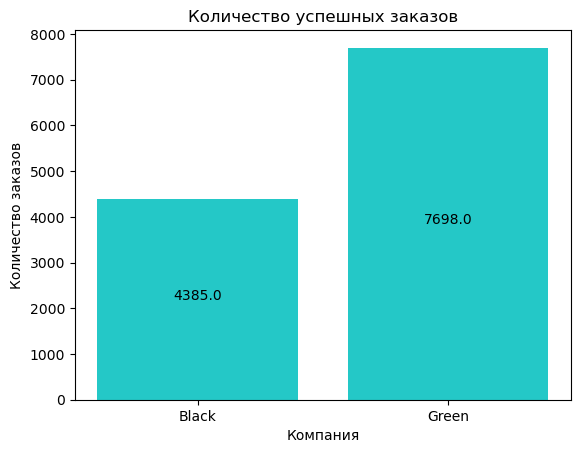

In [174]:
Green=df.Green_gvm_order_count.sum()
Black=df.Black_gvm_order_count.sum()

data={'company':['Black', 'Green'], 'orders': [Black, Green]}
df1=pd.DataFrame(data)
df1=df1.sort_values(by='orders')

plt.bar(df1['company'], df1['orders'], color = '#24c8c7')

for i in range(df1['orders'].shape[0]):
    plt.text(
        i, 
        df1['orders'].iloc[i] / 2,
        df1['orders'].iloc[i], 
        ha = 'center'
    )

plt.ylabel('Количество заказов')
plt.xlabel('Компания')
plt.title('Количество успешных заказов')
plt.show()

**Вывод :** Моя гипотеза подтвердилась, green молодая компания, которая не набрала еще аудиторию, но только входит на рынок и старается продвигаться за счет маркейтинга и хороших отзыввов ,после успешных заказов